7_neda_mimfpt_(ML_Lin_Reg_Regular_Scal_CV_Ridge_Lasso_Elastic_GrdSrcCV)_

Engin Abdan

### Libraries

In [1]:
import pandas as pd      
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import SCORERS

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

from scipy.stats import skew
import scipy.stats as stats

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('classic')

### Data

In [485]:
stu = pd.read_excel("std_ins_ml_data.xlsx")

In [486]:
drop_list = ["Unnamed: 0","Exams_Mean","Sprt_Mean", "Ins_of_Stu_Plt","Student", "Gender", "Plt_Or_Not"]
stu.drop(drop_list, inplace=True, axis=1)
stu.head(1)

,MI_Cat,Flight_Mean,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,Intrap,95,20,19,10,16,13,16,17,22


### Skewness

In [487]:
x = stu.drop(columns=["MI_Cat", "Flight_Mean"]).columns
for i in x:
    if skew(stu[i]) >= -0.5 and skew(stu[i]) < 0.5:
        print(f"{i} \t: {skew(stu[i])} \t>>> Normal")
    elif skew(stu[i]) >= 0.5 and skew(stu[i]) < 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Moderate")
    elif skew(stu[i]) >= 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Polynomial

In [488]:
x = stu.drop(columns=["MI_Cat","Flight_Mean"])
y = stu["Flight_Mean"]

In [489]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_features = polynomial_converter.fit_transform(x)
poly_features.shape

(100, 44)

### Train Test Split

In [490]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

### Scaling

In [491]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Metrics Formula

In [492]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

### Linear Regression

In [493]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
y_test_pred = lm.predict(x_test)
y_train_pred = lm.predict(x_train)

In [494]:
eval_metrics(y_test, y_test_pred)
print()
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: -4.176988460691519
MAE 		: 21.993897763059216
MSE 		: 705.6177749828532
RMSE 		: 26.563466923254826

Model testing performance:
--------------------------
R2_score 	: 0.6542419458006783
MAE 		: 5.463840596370188
MSE 		: 49.83777762089483
RMSE 		: 7.059587638162362


In [495]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
                          "mae" : mean_absolute_error(y_train, y_train_pred),
                          "mse" : mean_squared_error(y_train, y_train_pred),
                          "R2" : r2_score(y_train, y_train_pred)}, 

             "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
                         "mae" : mean_absolute_error(y_test, y_test_pred),
                         "mse" : mean_squared_error(y_test, y_test_pred),
                         "R2" : r2_score(y_test, y_test_pred)}}

ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,7.059588,26.563467
mae,5.463841,21.993898
mse,49.837778,705.617775
R2,0.654242,-4.176988


### Multicolineratiy

In [496]:
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [ ]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

### Cross Validate

In [498]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'matthews_corrcoef',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jacca

In [499]:
from sklearn.model_selection import cross_validate, cross_val_score
model = LinearRegression()

In [500]:
scores = cross_validate(model, x_train, y_train, scoring = ['r2',
                                                            'neg_mean_absolute_error',
                                                            'neg_mean_squared_error',
                                                            'neg_root_mean_squared_error'],
                                                            cv = 10)

In [501]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.000000,0.007994,-0.109267,-11.875447,-158.602575,-12.593751
2,0.000000,0.008005,-10.806051,-15.773774,-386.949357,-19.671028
3,0.000000,0.008007,-5.066700,-23.875719,-751.775498,-27.418525
4,0.000000,0.007991,-3.340480,-20.673827,-560.541979,-23.675768
5,0.000000,0.007999,-0.639165,-11.692564,-250.022826,-15.812110
6,0.000000,0.000000,-1.734621,-18.724623,-435.753448,-20.874708
7,0.000000,0.008006,-3.582338,-25.393601,-862.414707,-29.366898
8,0.008025,0.000000,0.047852,-7.926355,-107.923068,-10.388603
9,0.007969,0.000000,-8.400255,-27.173181,-912.783961,-30.212315
10,0.008023,0.000000,-6.042769,-19.397988,-506.504418,-22.505653


In [502]:
scores = pd.DataFrame(scores, index=range(1,11))

In [503]:
scores.iloc[:, 2:].mean()

test_r2                              -3.967379
test_neg_mean_absolute_error        -18.250708
test_neg_mean_squared_error        -493.327184
test_neg_root_mean_squared_error    -21.251936
dtype: float64

In [504]:
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: -4.176988460691519
MAE 		: 21.993897763059216
MSE 		: 705.6177749828532
RMSE 		: 26.563466923254826


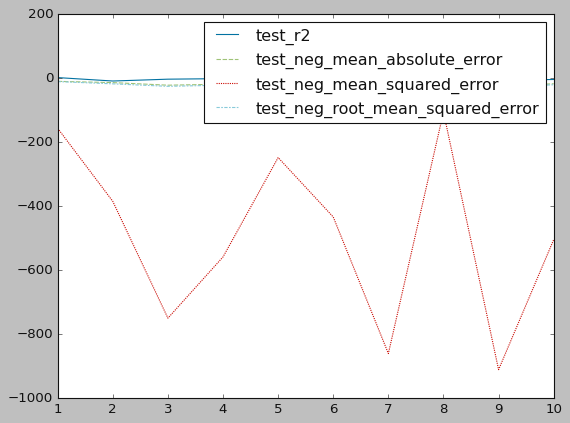

In [505]:
sns.lineplot(data = scores.iloc[:,2:]);

### Ridge

In [506]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1)
ridge_model.fit(x_train, y_train)
y_test_pred = ridge_model.predict(x_test)
y_train_pred = ridge_model.predict(x_train)

In [507]:
eval_metrics(y_train, y_train_pred)
print()
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: 0.22915783614199892
MAE 		: 8.906782310087163
MSE 		: 111.10966144267424
RMSE 		: 10.540856769858618

Model testing performance:
--------------------------
R2_score 	: -0.41934966141172536
MAE 		: 12.124242718941309
MSE 		: 193.45578179523878
RMSE 		: 13.908838261883657


In [508]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
                                "mae" : mean_absolute_error(y_train, y_train_pred),
                                "mse" : mean_squared_error(y_train, y_train_pred),
                                "R2" : r2_score(y_train, y_train_pred)}, 

                "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
                                "mae" : mean_absolute_error(y_test, y_test_pred),
                                "mse" : mean_squared_error(y_test, y_test_pred),
                                "R2" : r2_score(y_test, y_test_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,10.540857,13.908838
mae,8.906782,12.124243
mse,111.109661,193.455782
R2,0.229158,-0.419350


In [509]:
pd.concat([ls, rs], axis=1)

,lm_train,lm_test,ridge_train,ridge_test
rmse,7.059588,26.563467,10.540857,13.908838
mae,5.463841,21.993898,8.906782,12.124243
mse,49.837778,705.617775,111.109661,193.455782
R2,0.654242,-4.176988,0.229158,-0.419350


### Ridge & alpha=1

In [510]:
model = Ridge(alpha=1)

In [511]:
scores = cross_validate(model,
                        x_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10)

In [512]:
scores = pd.DataFrame(scores, index = range(1, 11))

In [513]:
scores.iloc[:,2:].mean()

test_r2                              -1.133577
test_neg_mean_absolute_error        -13.092430
test_neg_mean_squared_error        -232.460692
test_neg_root_mean_squared_error    -14.845635
dtype: float64

In [514]:
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: -0.41934966141172536
MAE 		: 12.124242718941309
MSE 		: 193.45578179523878
RMSE 		: 13.908838261883657


<AxesSubplot:>

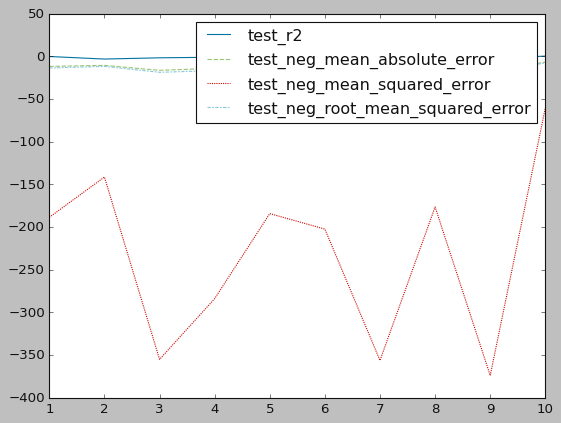

In [515]:
sns.lineplot(data = scores.iloc[:,2:])

### RidgeCV Best alpha

In [516]:
from sklearn.linear_model import RidgeCV

In [517]:
alpha_space = np.linspace(0.01, 1, 100)

ridge_cv_model = RidgeCV(alphas=alpha_space,
                         cv = 10,
                         scoring= "neg_root_mean_squared_error")

In [518]:
ridge_cv_model.fit(x_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [519]:
ridge_cv_model.alpha_

1.0

In [520]:
y_train_pred = ridge_cv_model.predict(x_train)
y_test_pred = ridge_cv_model.predict(x_test)

In [521]:
eval_metrics(y_train, y_train_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.22915783614199892
MAE 		: 8.906782310087163
MSE 		: 111.10966144267424
RMSE 		: 10.540856769858618


In [522]:
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: -0.41934966141172536
MAE 		: 12.124242718941309
MSE 		: 193.45578179523878
RMSE 		: 13.908838261883657


In [523]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
                                      "mae" : mean_absolute_error(y_train, y_train_pred),
                                      "mse" : mean_squared_error(y_train, y_train_pred),
                                      "R2" : r2_score(y_train, y_train_pred)}, 

                   "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
                                     "mae" : mean_absolute_error(y_test, y_test_pred),
                                     "mse" : mean_squared_error(y_test, y_test_pred),
                                     "R2" : r2_score(y_test, y_test_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,10.540857,13.908838
mae,8.906782,12.124243
mse,111.109661,193.455782
R2,0.229158,-0.419350


In [524]:
pd.concat([ls, rs, rcs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
rmse,7.059588,26.563467,10.540857,13.908838,10.540857,13.908838
mae,5.463841,21.993898,8.906782,12.124243,8.906782,12.124243
mse,49.837778,705.617775,111.109661,193.455782,111.109661,193.455782
R2,0.654242,-4.176988,0.229158,-0.419350,0.229158,-0.419350


### Lasso

In [525]:
from sklearn.linear_model import Lasso

In [526]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(x_train, y_train)

Lasso(alpha=1)

In [527]:
y_train_pred = lasso_model.predict(x_train)
y_test_pred = lasso_model.predict(x_test)

In [528]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.016730455748993567
MAE 		: 10.241878990509965
MSE 		: 141.72907411010186
RMSE 		: 11.905002062582849


In [529]:
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: -0.09493134520153301
MAE 		: 11.005285798594786
MSE 		: 149.23792576058537
RMSE 		: 12.216297547153367


In [530]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
                                "mae" : mean_absolute_error(y_train, y_train_pred),
                                "mse" : mean_squared_error(y_train, y_train_pred),
                                "R2" : r2_score(y_train, y_train_pred)}, 

                "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
                               "mae" : mean_absolute_error(y_test, y_test_pred),
                               "mse" : mean_squared_error(y_test, y_test_pred),
                               "R2" : r2_score(y_test, y_test_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,11.905002,12.216298
mae,10.241879,11.005286
mse,141.729074,149.237926
R2,0.016730,-0.094931


In [531]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
rmse,7.059588,26.563467,10.540857,13.908838,10.540857,13.908838,11.905002,12.216298
mae,5.463841,21.993898,8.906782,12.124243,8.906782,12.124243,10.241879,11.005286
mse,49.837778,705.617775,111.109661,193.455782,111.109661,193.455782,141.729074,149.237926
R2,0.654242,-4.176988,0.229158,-0.419350,0.229158,-0.419350,0.016730,-0.094931


### Lasso & alpha=1

In [532]:
model = Lasso(alpha=1)

In [533]:
scores = cross_validate(model,
                        x_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'], 
                        cv=10)

In [534]:
scores = pd.DataFrame(scores, index = range(1, 11))

In [535]:
scores.iloc[:,2:].mean()

test_r2                              -0.608909
test_neg_mean_absolute_error        -11.025905
test_neg_mean_squared_error        -161.029921
test_neg_root_mean_squared_error    -12.574260
dtype: float64

In [536]:
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: -0.09493134520153301
MAE 		: 11.005285798594786
MSE 		: 149.23792576058537
RMSE 		: 12.216297547153367


<AxesSubplot:>

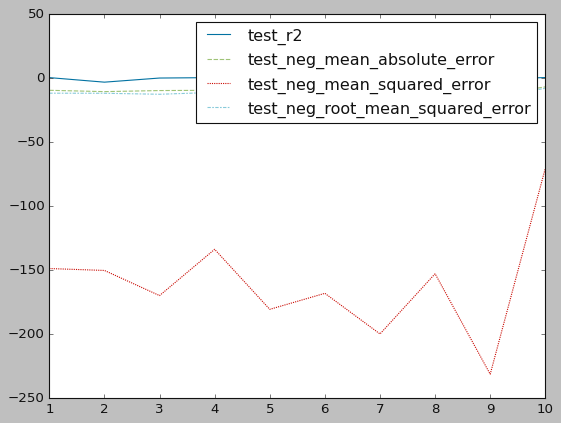

In [537]:
sns.lineplot(data = scores.iloc[:,2:])

### LassoCV Best alpha

In [538]:
alpha_space = np.linspace(0.01, 1, 100)

lasso_cv_model = LassoCV(alphas = alpha_space,
                         cv = 10,
                         max_iter=100000)

In [539]:
lasso_cv_model.fit(x_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [540]:
lasso_cv_model.alpha_

1.0

In [541]:
y_train_pred = lasso_cv_model.predict(x_train)

In [542]:
y_test_pred = lasso_cv_model.predict(x_test)

In [543]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.016730455748993567
MAE 		: 10.241878990509965
MSE 		: 141.72907411010186
RMSE 		: 11.905002062582849


In [544]:
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: -0.09493134520153301
MAE 		: 11.005285798594786
MSE 		: 149.23792576058537
RMSE 		: 12.216297547153367


In [545]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
                                      "mae" : mean_absolute_error(y_train, y_train_pred),
                                      "mse" : mean_squared_error(y_train, y_train_pred),
                                      "R2" : r2_score(y_train, y_train_pred)}, 

                   "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
                                     "mae" : mean_absolute_error(y_test, y_test_pred),
                                     "mse" : mean_squared_error(y_test, y_test_pred),
                                     "R2" : r2_score(y_test, y_test_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,11.905002,12.216298
mae,10.241879,11.005286
mse,141.729074,149.237926
R2,0.016730,-0.094931


In [546]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
rmse,7.059588,26.563467,10.540857,13.908838,10.540857,13.908838,11.905002,12.216298,11.905002,12.216298
mae,5.463841,21.993898,8.906782,12.124243,8.906782,12.124243,10.241879,11.005286,10.241879,11.005286
mse,49.837778,705.617775,111.109661,193.455782,111.109661,193.455782,141.729074,149.237926,141.729074,149.237926
R2,0.654242,-4.176988,0.229158,-0.419350,0.229158,-0.419350,0.016730,-0.094931,0.016730,-0.094931


### ElasticNet

In [547]:
from sklearn.linear_model import ElasticNet

In [548]:
elastic_model = ElasticNet()

In [549]:
elastic_model.fit(x_train, y_train)

ElasticNet()

In [550]:
elastic_model.l1_ratio

0.5

In [551]:
elastic_model.alpha

1.0

In [552]:
y_train_pred = elastic_model.predict(x_train)

In [553]:
y_test_pred = elastic_model.predict(x_test)

In [554]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.02239427076380962
MAE 		: 10.20201133007969
MSE 		: 140.91268834622443
RMSE 		: 11.87066503386497


In [555]:
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: -0.10979000548990525
MAE 		: 11.085887494337836
MSE 		: 151.26314464826797
RMSE 		: 12.298908270585157


In [556]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
                                    "mae" : mean_absolute_error(y_train, y_train_pred),
                                    "mse" : mean_squared_error(y_train, y_train_pred),
                                    "R2" : r2_score(y_train, y_train_pred)}, 

                  "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
                                   "mae" : mean_absolute_error(y_test, y_test_pred),
                                   "mse" : mean_squared_error(y_test, y_test_pred),
                                   "R2" : r2_score(y_test, y_test_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,11.870665,12.298908
mae,10.202011,11.085887
mse,140.912688,151.263145
R2,0.022394,-0.109790


In [557]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,7.059588,26.563467,10.540857,13.908838,10.540857,13.908838,11.905002,12.216298,11.905002,12.216298,11.870665,12.298908
mae,5.463841,21.993898,8.906782,12.124243,8.906782,12.124243,10.241879,11.005286,10.241879,11.005286,10.202011,11.085887
mse,49.837778,705.617775,111.109661,193.455782,111.109661,193.455782,141.729074,149.237926,141.729074,149.237926,140.912688,151.263145
R2,0.654242,-4.176988,0.229158,-0.419350,0.229158,-0.419350,0.016730,-0.094931,0.016730,-0.094931,0.022394,-0.109790


### ElasticNet & alpha=1

In [558]:
model = ElasticNet(alpha=1)

In [559]:
scores = cross_validate(model,
                        x_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10)

In [560]:
scores = pd.DataFrame(scores, index = range(1, 11))

In [561]:
scores.iloc[:,2:].mean()

test_r2                              -0.648639
test_neg_mean_absolute_error        -11.211781
test_neg_mean_squared_error        -166.446703
test_neg_root_mean_squared_error    -12.773947
dtype: float64

In [562]:
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: -0.10979000548990525
MAE 		: 11.085887494337836
MSE 		: 151.26314464826797
RMSE 		: 12.298908270585157


<AxesSubplot:>

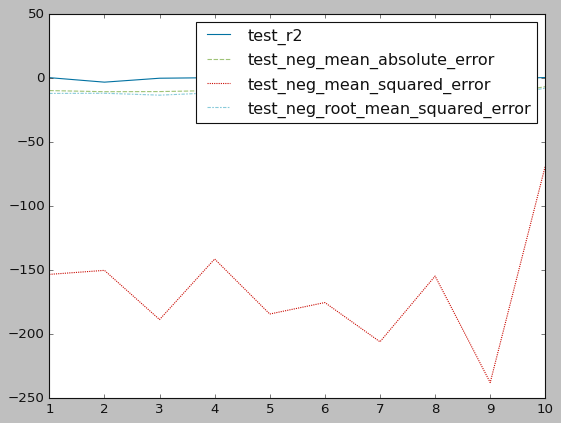

In [563]:
sns.lineplot(data = scores.iloc[:,2:])

### ElasticNetCV Best alpha

In [564]:
alpha_space = np.linspace(0.01, 1, 100)

elastic_cv_model = ElasticNetCV(alphas = alpha_space,
                                l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], 
                                cv = 10,
                                max_iter = 100000)

In [565]:
elastic_cv_model.fit(x_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [566]:
elastic_cv_model.alpha_

1.0

In [567]:
elastic_cv_model.l1_ratio_

1.0

In [568]:
y_train_pred = elastic_cv_model.predict(x_train)

In [569]:
y_test_pred = elastic_cv_model.predict(x_test)

In [570]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.016730455748993567
MAE 		: 10.241878990509965
MSE 		: 141.72907411010186
RMSE 		: 11.905002062582849


In [571]:
eval_metrics(y_test, y_test_pred)


Model testing performance:
--------------------------
R2_score 	: -0.09493134520153301
MAE 		: 11.005285798594786
MSE 		: 149.23792576058537
RMSE 		: 12.216297547153367


In [572]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
                                          "mae" : mean_absolute_error(y_train, y_train_pred),
                                          "mse" : mean_squared_error(y_train, y_train_pred),
                                          "R2" : r2_score(y_train, y_train_pred)}, 

                     "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
                                         "mae" : mean_absolute_error(y_test, y_test_pred),
                                         "mse" : mean_squared_error(y_test, y_test_pred),
                                         "R2" : r2_score(y_test, y_test_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,11.905002,12.216298
mae,10.241879,11.005286
mse,141.729074,149.237926
R2,0.016730,-0.094931


In [573]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
rmse,7.059588,26.563467,10.540857,13.908838,10.540857,13.908838,11.905002,12.216298,11.905002,12.216298,11.870665,12.298908,11.905002,12.216298
mae,5.463841,21.993898,8.906782,12.124243,8.906782,12.124243,10.241879,11.005286,10.241879,11.005286,10.202011,11.085887,10.241879,11.005286
mse,49.837778,705.617775,111.109661,193.455782,111.109661,193.455782,141.729074,149.237926,141.729074,149.237926,140.912688,151.263145,141.729074,149.237926
R2,0.654242,-4.176988,0.229158,-0.419350,0.229158,-0.419350,0.016730,-0.094931,0.016730,-0.094931,0.022394,-0.109790,0.016730,-0.094931


### GridSearchCV

In [574]:
from sklearn.model_selection import GridSearchCV

In [575]:
elastic_model = ElasticNet(max_iter=10000)

In [576]:
param_grid = {"alpha":[0.2, 0.4, 0.6, 0.8, 1.0],
            "l1_ratio":[0.2, 0.4, 0.6, 0.8, 1.0]}

In [577]:
grid_model = GridSearchCV(estimator = elastic_model,
                          param_grid = param_grid,
                          scoring = 'neg_root_mean_squared_error',
                          cv =10,
                          verbose =2)

In [578]:
grid_model.fit(x_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.2

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [579]:
grid_model.best_params_

{'alpha': 1.0, 'l1_ratio': 1.0}

In [ ]:
pd.DataFrame(grid_model.cv_results_)

### Using Best Model & GridSearchCV (ElasticNet & GridSearchCV)

In [581]:
y_train_pred = grid_model.predict(x_train)

In [582]:
y_test_pred = grid_model.predict(x_test)

In [583]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.016730455748993567
MAE 		: 10.241878990509965
MSE 		: 141.72907411010186
RMSE 		: 11.905002062582849


In [584]:
eval_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
R2_score 	: -0.09493134520153301
MAE 		: 11.005285798594786
MSE 		: 149.23792576058537
RMSE 		: 12.216297547153367


In [585]:
elastic_GrdCV_scores = {"elastic_GrdCV_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
                                                "mae" : mean_absolute_error(y_train, y_train_pred),
                                                "mse" : mean_squared_error(y_train, y_train_pred),
                                                "R2" : r2_score(y_train, y_train_pred)}, 

                        "elastic_GrdCV_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
                                               "mae" : mean_absolute_error(y_test, y_test_pred),
                                               "mse" : mean_squared_error(y_test, y_test_pred),
                                               "R2" : r2_score(y_test, y_test_pred)}}
egrds = pd.DataFrame(elastic_GrdCV_scores)
egrds

,elastic_GrdCV_train,elastic_GrdCV_test
rmse,11.905002,12.216298
mae,10.241879,11.005286
mse,141.729074,149.237926
R2,0.016730,-0.094931


In [586]:
final_scores = pd.concat([ls,rs, rcs, lss, lcs, es, ecs, egrds], axis = 1)
final_scores

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test,elastic_GrdCV_train,elastic_GrdCV_test
rmse,7.059588,26.563467,10.540857,13.908838,10.540857,13.908838,11.905002,12.216298,11.905002,12.216298,11.870665,12.298908,11.905002,12.216298,11.905002,12.216298
mae,5.463841,21.993898,8.906782,12.124243,8.906782,12.124243,10.241879,11.005286,10.241879,11.005286,10.202011,11.085887,10.241879,11.005286,10.241879,11.005286
mse,49.837778,705.617775,111.109661,193.455782,111.109661,193.455782,141.729074,149.237926,141.729074,149.237926,140.912688,151.263145,141.729074,149.237926,141.729074,149.237926
R2,0.654242,-4.176988,0.229158,-0.419350,0.229158,-0.419350,0.016730,-0.094931,0.016730,-0.094931,0.022394,-0.109790,0.016730,-0.094931,0.016730,-0.094931


### Comparing Scores With Graph

In [587]:
final_scores = final_scores.T
final_scores

,rmse,mae,mse,R2
lm_train,7.059588,5.463841,49.837778,0.654242
lm_test,26.563467,21.993898,705.617775,-4.176988
ridge_train,10.540857,8.906782,111.109661,0.229158
ridge_test,13.908838,12.124243,193.455782,-0.419350
ridge_cv_train,10.540857,8.906782,111.109661,0.229158
ridge_cv_test,13.908838,12.124243,193.455782,-0.419350
lasso_train,11.905002,10.241879,141.729074,0.016730
lasso_test,12.216298,11.005286,149.237926,-0.094931
lasso_cv_train,11.905002,10.241879,141.729074,0.016730
lasso_cv_test,12.216298,11.005286,149.237926,-0.094931


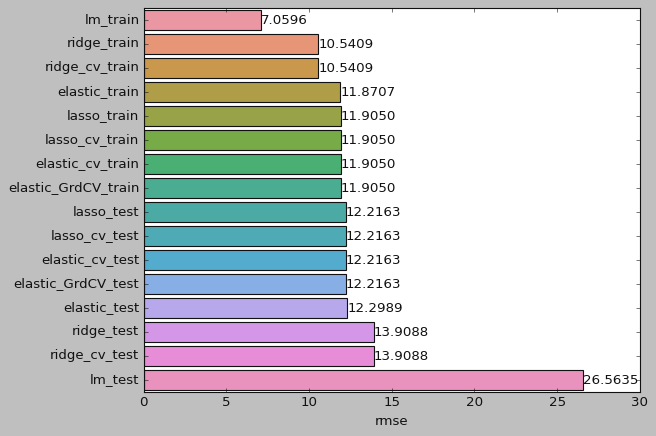

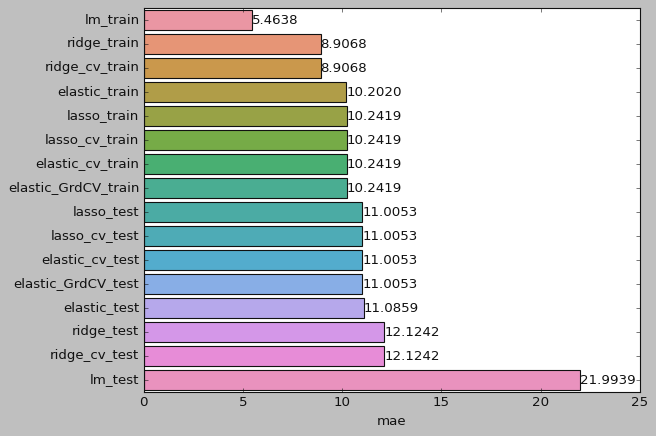

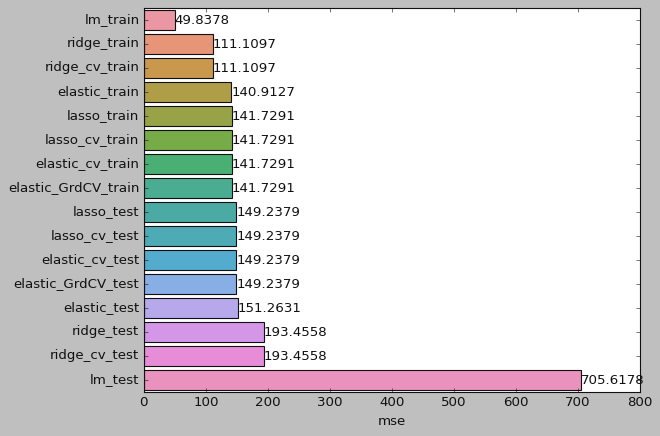

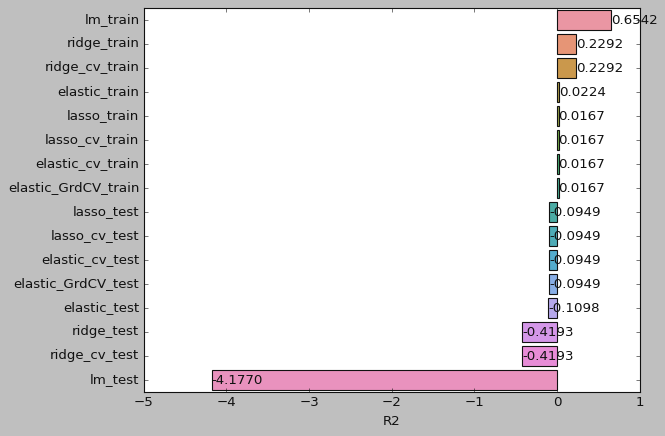

In [588]:
metrics = final_scores.columns
for i,j in enumerate(metrics):
    plt.figure(i)
    if j == "R2":
        ascending = False
    else:
        ascending = True
    compare = final_scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

### Feature importances with Ridge

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(x_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(x_train, y_train)
viz.show()

### Feature importances with Lasso

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(x_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(x_train, y_train)
viz.show()

### Final Model

In [591]:
columns_name = x.columns

In [592]:
final_scaler = StandardScaler()

In [593]:
final_scaler.fit(x)

StandardScaler()

In [594]:
x = final_scaler.transform(x)

In [595]:
lasso_cv_final_model = LassoCV(cv=10, max_iter=100000)

In [596]:
lasso_cv_final_model.fit(x,y)

LassoCV(cv=10, max_iter=100000)

In [597]:
y_pred = lasso_cv_final_model.predict(x)

In [598]:
eval_metrics(y, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.0
MAE 		: 10.52
MSE 		: 144.76
RMSE 		: 12.031624994156026


### Prediction

In [599]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [600]:
my_dict = final_scaler.transform(pred_data)
my_dict

array([[ 5.6597664 ,  5.01792289,  5.33945537,  6.18372421, -0.84897172,
        -0.07527099,  0.42783058,  1.02413127]])

In [601]:
lasso_cv_final_model.predict(my_dict)

array([75.])

In [602]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Flight_Score = lasso_cv_final_model.predict(my_dict)[0].astype("int")

if Flight_Score >= 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Pilot")
if Flight_Score < 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Not Pilot")

MI_Cat		: Mus_Int
MI_Score	: 37
Flight_Score	: 75
Result		: Pilot
